# Decision Tree Regression

## **Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Importing the dataset

In [2]:
dataset = pd.read_csv('Data-regression.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## 1. Multiple Linear Regression

In [3]:
## Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting test results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 40748.96  37731.  ]
 [122699.62 122391.  ]
 [ 64961.66  57081.  ]
 [ 63099.14  63218.  ]
 [115249.56 116969.  ]
 [107799.5  109431.  ]]


## 2. Polynomial Regression

[[ 43186.49  37731.  ]
 [118507.65 122391.  ]
 [ 62979.04  57081.  ]
 [ 60912.32  63218.  ]
 [115149.24 116969.  ]
 [110084.22 109431.  ]]


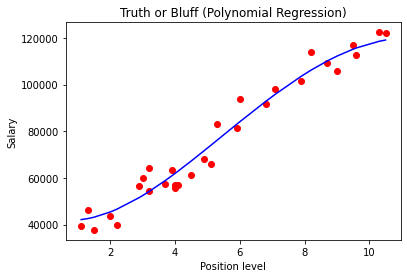

In [4]:
## Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

# Predicting test results
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Visualize the model 
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## 3. Support Vector Regression (SVR)

In [5]:
# data preprocess
y = y.reshape(-1, 1) #equals y = y.reshape(len(y), 1) -- One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimensions.
## Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Training the SVR model on the Training set
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

## Predicting the Test set results
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 44027.15  37731.  ]
 [109889.58 122391.  ]
 [ 60229.23  57081.  ]
 [ 58659.27  63218.  ]
 [110018.99 116969.  ]
 [107720.24 109431.  ]]


/Users/liny/miniforge3/envs/tf_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


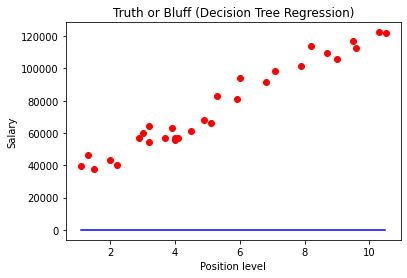

In [6]:
# Visualize the model 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [7]:
y = y.reshape(len(y), 1)

In [8]:
y.ndim

2

## 4. Decision Tree Regression

[[ 46205.   37731. ]
 [121872.  122391. ]
 [ 56375.5  57081. ]
 [ 56375.5  63218. ]
 [112635.  116969. ]
 [105582.  109431. ]]


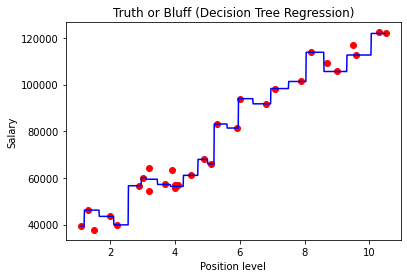

In [9]:
## Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Decision Tree Regression model on the Training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
# Predicting test results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Visualize the model 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## 5. Random Forest Regression

[[ 47063.5   37731.  ]
 [117043.9  122391.  ]
 [ 56437.47  57081.  ]
 [ 56437.47  63218.  ]
 [111720.1  116969.  ]
 [104818.1  109431.  ]]


/var/folders/sd/hl_8_g39189b03rq7tsq0ty00000gn/T/ipykernel_8263/3627267662.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


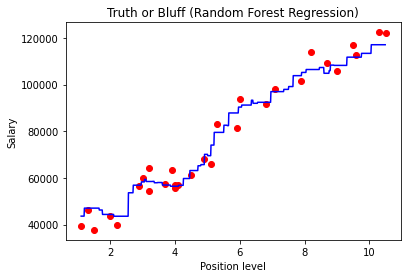

In [13]:
## Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

## Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Visualize the model 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## 6. XGB regressor

[[ 46204.68  37731.  ]
 [121871.71 122391.  ]
 [ 56375.67  57081.  ]
 [ 56375.67  63218.  ]
 [112634.98 116969.  ]
 [105582.35 109431.  ]]


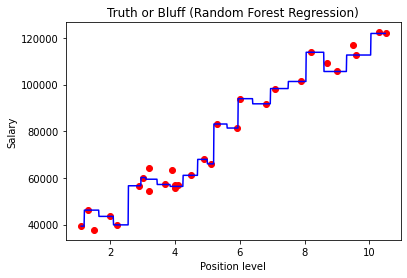

In [16]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

## Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Visualize the model 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## ** Evaluating the Model Performance

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9675706804534532